<a href="https://colab.research.google.com/github/IfrazQazi/Play-Store-App-Review-Analysis-Capstone-Project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## First importing libraries and mounting google drive.
## loading data into data frame

In [346]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


%matplotlib inline

In [347]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [348]:
# loading play store data into data frame
dir_path='/content/drive/MyDrive/AlmaBetter/Module 1/Capstone Project Play Store App Review Analysis/'
play_s_d=pd.read_csv(dir_path+'Play Store Data.csv')

In [349]:
# loading User Reviews into data frame
user_review=pd.read_csv(dir_path+'User Reviews.csv')

#The objective of this project is to deliver insights to understand customer demands better and help developer to populriaz the application

##Discussion of Google play store dataset will involve various steps such as:
## 1)loading the data into data frame
## 2)cleaning the data
## 3)extracting statistics from the dataset
## 4)exploratory analysis and visualizations
## 5)questions that can be asked from the dataset conclusion
#We can move to first step of data analysis by cleaning the data that will make the results more accurate.

In [350]:
play_s_d.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [351]:
play_s_d.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [352]:
play_s_d.shape

(10841, 13)

# Above dataframe having more than 10000 rows and 13 columns.

##Play store dataframe of app which consist of name of application ,category of app , rating  given by users , number of users review, size of app in(Mb/Kb) , number of installs of each app , type of app(free/paid), price of app, rating of content , genres of app , last updated, current version of application and requried android version

In [353]:
play_s_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [354]:
user_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [355]:
user_review.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [356]:
user_review.shape

(64295, 5)

In [357]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Above User_review dataframe is having more than 60000 rows and 5 columns:
## name of app , translated_review given by users, sentiment , sentiment polarity , sentiment subjective

## lets see first play store dataset


In [358]:
# Replacing space in columns with _

play_s_d.columns=[each.replace(" ","_") for each in play_s_d.columns]

In [359]:
play_s_d['App'].duplicated().any()

True

## from above output we can see there is duplicate values in App column

In [360]:
# removing duplicate values in App column
play_s_d.drop_duplicates(subset='App',inplace=True)

In [361]:
# checking if there is any duplicate value
play_s_d['App'].duplicated().any()

False

## now i have successfully removed duplicate values from App column

In [362]:
play_s_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content_Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last_Updated    9660 non-null   object 
 11  Current_Ver     9652 non-null   object 
 12  Android_Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## as we can see the play store dataset is having Review, Size of app, number of installs, and price is object data type and we can also see there is null value in some columns 
## now first i will convert Review, Size, Installs and price into numeric data type

In [363]:
#Change reviews column datatype to int
play_s_d.Reviews = play_s_d.Reviews.apply(lambda x: float(str(x).replace('M', '')) if 'M' in str(x) else x) 
play_s_d.Reviews = play_s_d.Reviews.apply(lambda x:int(x))

In [364]:
# check data type of Reviews column and check if there is any null value
play_s_d['Reviews'].dtype  ,play_s_d['Reviews'].isna().any()

(dtype('int64'), False)

In [365]:
#converting column "Size"  Mb Kb and  (+) and (,) to float using lamda function
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x) # 1 MB is equal to 1000 KB
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)


In [366]:
play_s_d['Size'] = play_s_d['Size'].apply(lambda x: float(x))

In [367]:
play_s_d['Size'].describe()

count    8433.000000
mean       20.511453
std        24.293604
min         0.008500
25%         4.600000
50%        12.000000
75%        28.000000
max      1000.000000
Name: Size, dtype: float64

## minimum Size is not zero so i can move forward

## so now i have successfully converted two columns.
## Reviews and Size are now numeric data type

In [368]:
play_s_d['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

## we can see that there is + and coma(,) symbol and Free srting
## so i will remove those symbolys
## replace Free with nan

In [369]:
# converting column 'Installs'
play_s_d['Installs'] = play_s_d['Installs'].apply(lambda x: str(x).replace('Free', 'NaN') if 'Free' in str(x) else x)
play_s_d['Installs'] = play_s_d['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
play_s_d['Installs'] = play_s_d['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
play_s_d['Installs']=play_s_d['Installs'].apply(lambda x: float(x))

In [370]:
play_s_d['Installs'].min(),play_s_d['Installs'].max()

(0.0, 1000000000.0)

In [371]:
# checking data type of Installs column
play_s_d['Installs'].dtype

dtype('float64')

## Now we have successfully converted Installs column into float so now we can move forward

## lets see Price column

In [372]:
play_s_d['Price'].dtype

dtype('O')

In [373]:
play_s_d['Price'].describe()

count     9660
unique      93
top          0
freq      8903
Name: Price, dtype: object

In [374]:
play_s_d['Price'].min(),play_s_d['Price'].max()

('$0.99', 'Everyone')

## As we can see there is dollar symbol and having string 'Everyone' and its data type is object
## so i will remove dollar symbol and replace Everyone with nan

In [375]:
# converting column "Price" 
play_s_d['Price'] = play_s_d['Price'].apply(lambda x: str(x).replace('Everyone', 'NaN') if 'Everyone' in str(x) else x)

play_s_d['Price'] = play_s_d['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
play_s_d['Price'] = play_s_d['Price'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)

In [376]:
play_s_d['Price']=play_s_d['Price'].apply(lambda x: float(x))

In [377]:
play_s_d['Price'].describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

##Now we have successfully converted Price column into float so now we can move forward

In [378]:
play_s_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   int64  
 4   Size            8433 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content_Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last_Updated    9660 non-null   object 
 11  Current_Ver     9652 non-null   object 
 12  Android_Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


## Now I have changed the data type of coulmns Reviews,Size,Installs,Price from object to float and integer data type.



In [379]:
play_s_d.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             1
Type                 1
Price                1
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

## lets move to replace missing values

In [380]:
play_s_d['Rating'].mean()

4.175051848237164

In [381]:
# replace null values in column Rating with mean()
play_s_d['Rating'].fillna(value=4.1,inplace=True)

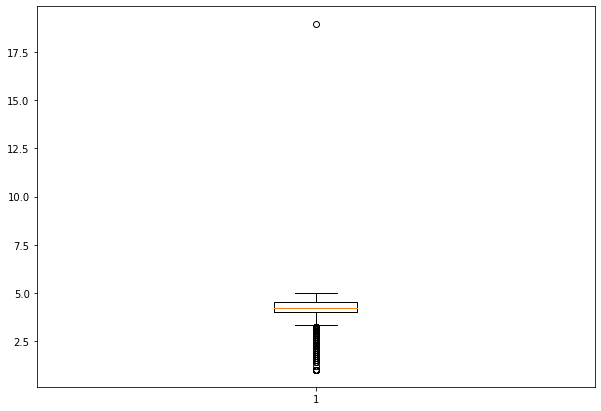

In [382]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(play_s_d['Rating'])
 
# show plot
plt.show()

## There is an outlier

In [383]:
play_s_d['Rating'].max()

19.0

## we know that maximum rating should be 5 but the above output is having greater than 5 rating
##lets see how many rows are having rating greater than zero

In [384]:
play_s_d[play_s_d['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,1000.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [385]:
play_s_d.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             1
Type                 1
Price                1
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

## As we can see from above two output that in row 10472  almost every column is having invalid data   

## It has only one row where rating is greater than 5 and Installs, Price,Content_Rating,Android_Ver is having Null value and Category , Type, Genres Last_Updated and Current_Ver is having invalid data so we can simply just drop that row 

In [386]:
play_s_d.drop([10472],inplace= True)

In [387]:
play_s_d[play_s_d['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


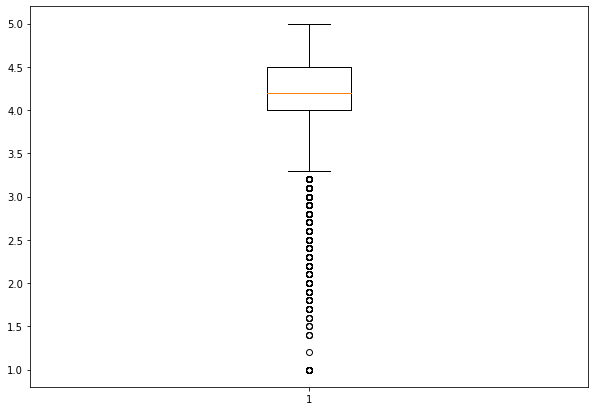

In [388]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(play_s_d['Rating'])
 
# show plot
plt.show()

In [389]:
play_s_d['Rating'].isna().any()

False

## now i have successfully removed null values in Rating column

In [390]:
play_s_d[play_s_d['Price'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [391]:
play_s_d[play_s_d['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,4.1,0,NaN,0.0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [392]:
play_s_d['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

## we can see that there is Three unique values of Type column
## i am thinking that replace nan with free if price is zero and paid if price is greater than zero

In [393]:
# replace nan with free if price is zero and paid if price is greater than zero
play_s_d.loc[play_s_d.Price == 0, 'Type'] = "Free"
play_s_d.loc[play_s_d.Price > 0, 'Type'] = "Paid"

In [394]:
play_s_d.Type.unique()

array(['Free', 'Paid'], dtype=object)

## now i have successfully replaced NaN  values with free and paid

In [395]:
play_s_d.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

## Lets move to the Size column

In [396]:
play_s_d[play_s_d['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000.0,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,10000000.0,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,1000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,5000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,100000.0,Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,100000.0,Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,1000.0,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,100000.0,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000.0,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


## Let us replace the missing values of the Size Column with the Mean value of that entire column.

In [397]:
# lets see Mean of the Size column
play_s_d['Size'].mean()

20.39528931451608

In [398]:
# replacing null value in Size column with Mean
play_s_d['Size'].fillna(value=20.35, inplace = True)

In [399]:
# Check if there is any null value
play_s_d[play_s_d['Size'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


## so now we have succefully replaced null value in Column Size

## so now we have two columns which are having null values
## Android_Ver and Current_Ver

In [400]:
play_s_d[play_s_d['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000.0,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000.0,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [401]:
play_s_d[play_s_d['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.700,5000.0,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.011,1000000.0,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.700,500000.0,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.1,0,0.222,100.0,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14.000,50000.0,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.1,44,7.200,10000.0,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.1,1,0.237,10.0,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.1,8,0.658,1000.0,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


## I am thinking that in Android_Ver and Current_Ver columns i can replace null value with  the value that appears most often(mode)

In [402]:
# checking what is the mode of Android_Ver column
play_s_d['Android_Ver'].mode(dropna=True)

0    4.1 and up
dtype: object

In [403]:
# checking what is the mode of Current_Ver column
play_s_d['Current_Ver'].mode(dropna=True)

0    Varies with device
dtype: object

## Now I have found the mode of Android_Ver and Current_Ver

In [404]:
# replacing null value in column Android_ver with 4.1 and up
play_s_d['Android_Ver'].fillna('4.1 and up', inplace = True)

In [405]:
# replacing null value in column Current_ver with Varies with device
play_s_d['Current_Ver'].fillna('Varies with device', inplace = True)

In [406]:
play_s_d[play_s_d['Android_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [407]:
play_s_d[play_s_d['Current_Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [408]:
play_s_d.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

## We have Successfully replaced null values in every column
## so now we dont have any column which is having null values

## Lets move to user_review Dataframe

In [409]:
user_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [410]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [411]:
user_review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [412]:
user_review.Sentiment.unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [413]:
user_review.loc[user_review['Sentiment'].isna() & user_review['Sentiment_Polarity'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## there is lots of null values in all column in user review dataset

## droping null values from dataset user_review

In [414]:
# drop null values from dataset
user_review.dropna(inplace=True)

In [415]:
user_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [416]:
merged_df = play_s_d.merge(user_review, on="App")


In [417]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667


## in merged dataframe we have 4 new columns Translated_Review, Sentiment,Sentiment_Polarity, Sentiment_Subjectivity

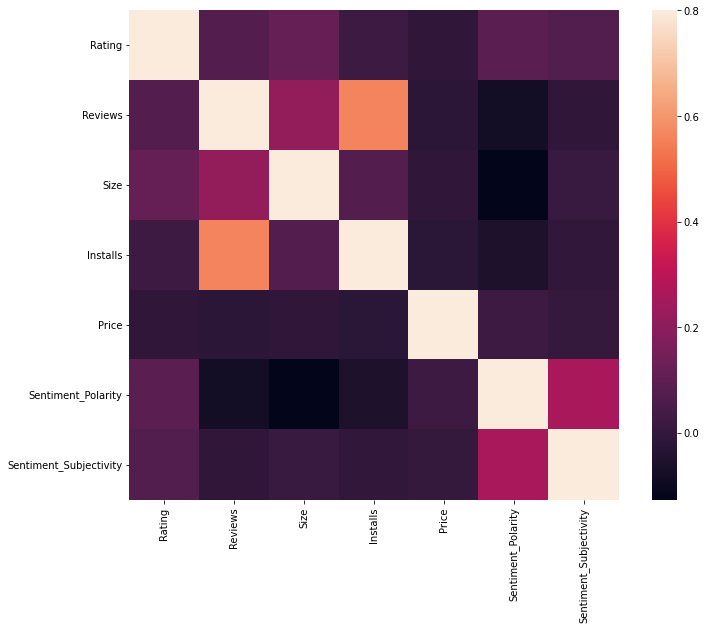

In [418]:
# Correlation Matrix using Heatmap
corrmat = merged_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

##**Is sentiment subjectivity proportional to sentiment polarity?**

In [419]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

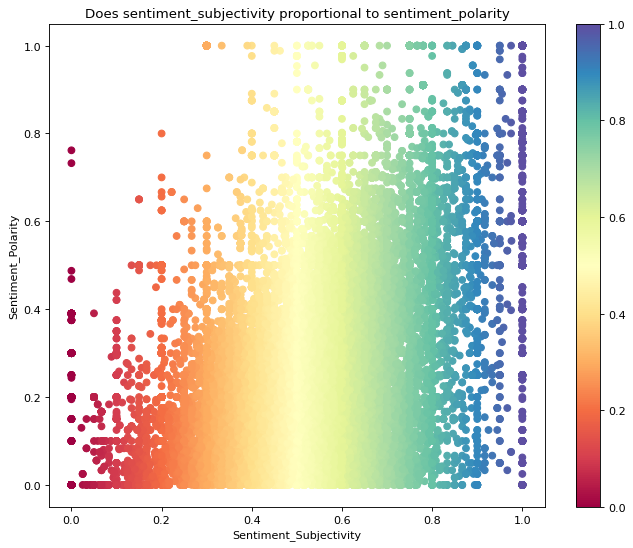

In [420]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':80})
plt.scatter( merged_df['Sentiment_Subjectivity'],merged_df['Sentiment_Polarity'], c=merged_df['Sentiment_Subjectivity'], cmap='Spectral')
plt.colorbar()
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.xlabel('Sentiment_Subjectivity')
plt.ylabel('Sentiment_Polarity')
plt.show()

##From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

## **How sentiment is divided for different type of reviews?**

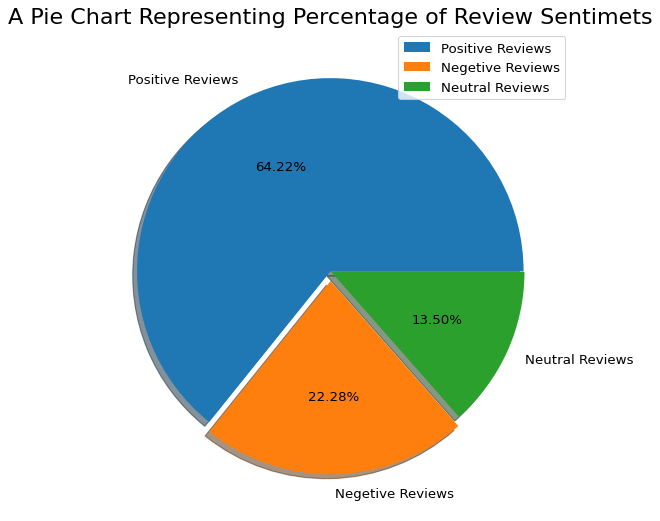

In [421]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

## **what is the count of sentiment according to Category?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



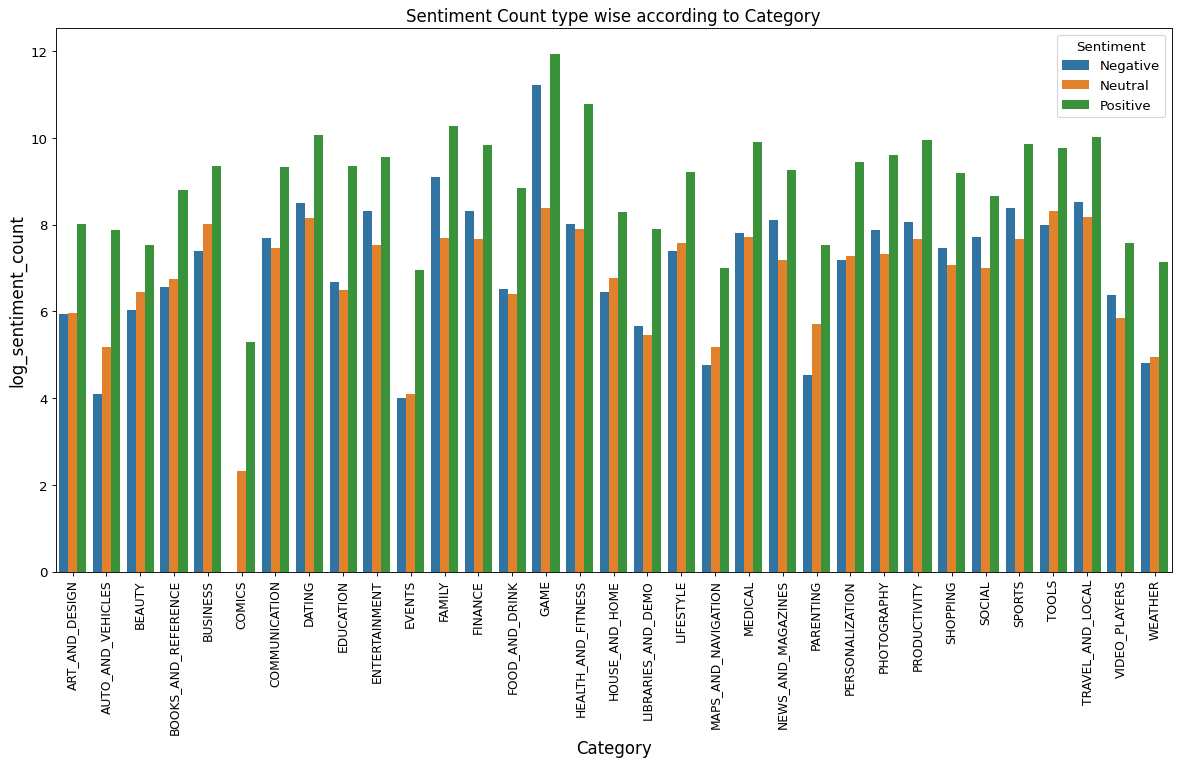

In [422]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Sentiment Count type wise according to Category",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

## **It can be seen from above plot that every category is having high Positive reviews than Negative and Neutral reviews**

##**Top 20 Category Having highest number of Installs**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



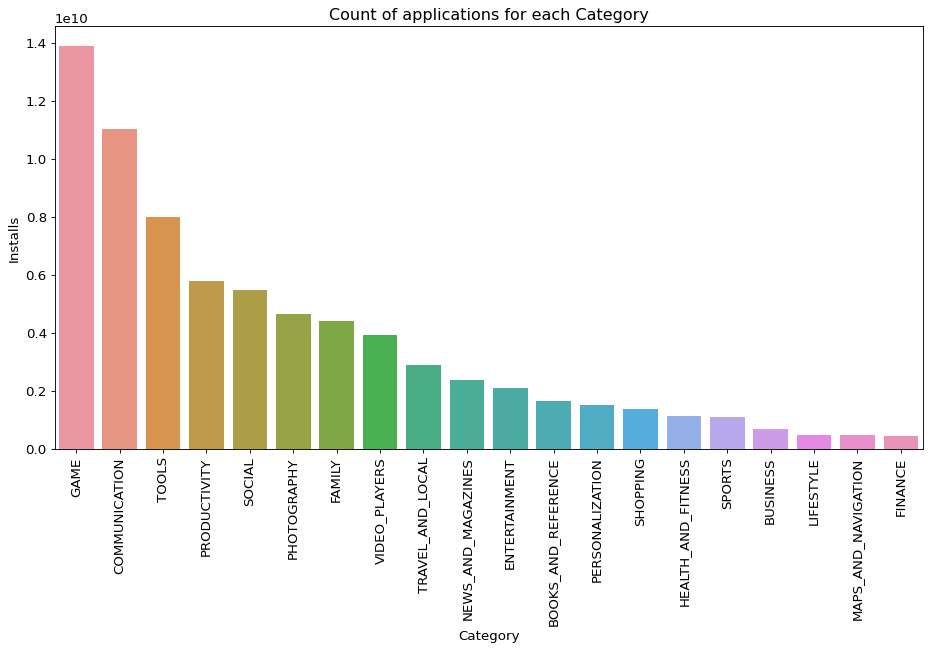

In [423]:
top_category = play_s_d.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

category_installs = play_s_d.groupby(['Category'])[['Installs']].sum()
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs.sort_values('Installs',ascending=False)[0:20]
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Count of applications for each Category")
sns.barplot('Category', 'Installs',data=top_20_category_installs)
plt.show()


## Top 10 Genres and count of application

In [424]:
top_genres = play_s_d.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})


In [425]:
genres_installs = play_s_d.groupby(['Genres'])[['App']].count()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')

top_10_genres_installs = top_genres_installs.sort_values('Count',ascending=False)[0:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



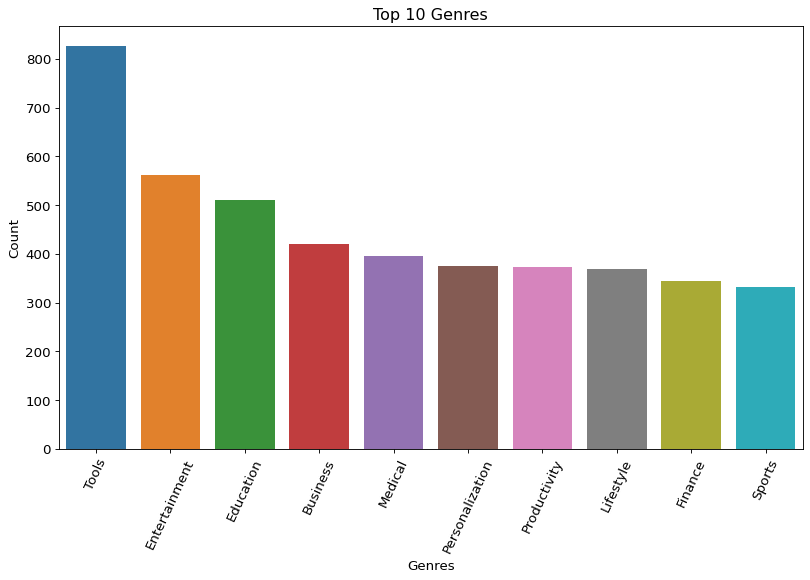

In [426]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Count of application")
plt.title("Top 10 Genres")
sns.barplot(top_10_genres_installs.Genres, top_10_genres_installs.Count)
plt.show()

## From the above graph as we can see the Tools genres is having highest number of application

## **what is the Average Rating of top 10 highest rated genres and top 10 lowest rated genres?**

In [427]:
genres_ratings_df = play_s_d.groupby(['Genres'])[['Rating']].mean()
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
# Highest and lowest rated Genres
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)
highest_rated_genres = genres_installs_ratings.iloc[0:10]
lowest_rated_genres = genres_installs_ratings.iloc[-10:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



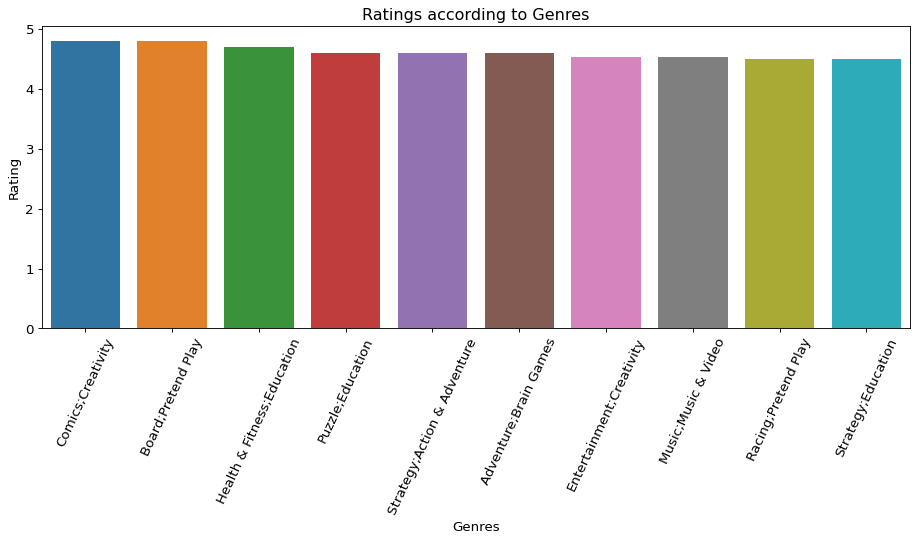

In [428]:
# Bar plot for Highest rated genres
plt.figure(figsize=(14,5))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

## **from the above plot we can see that all top 10 genres having more than 4 Average Rating**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



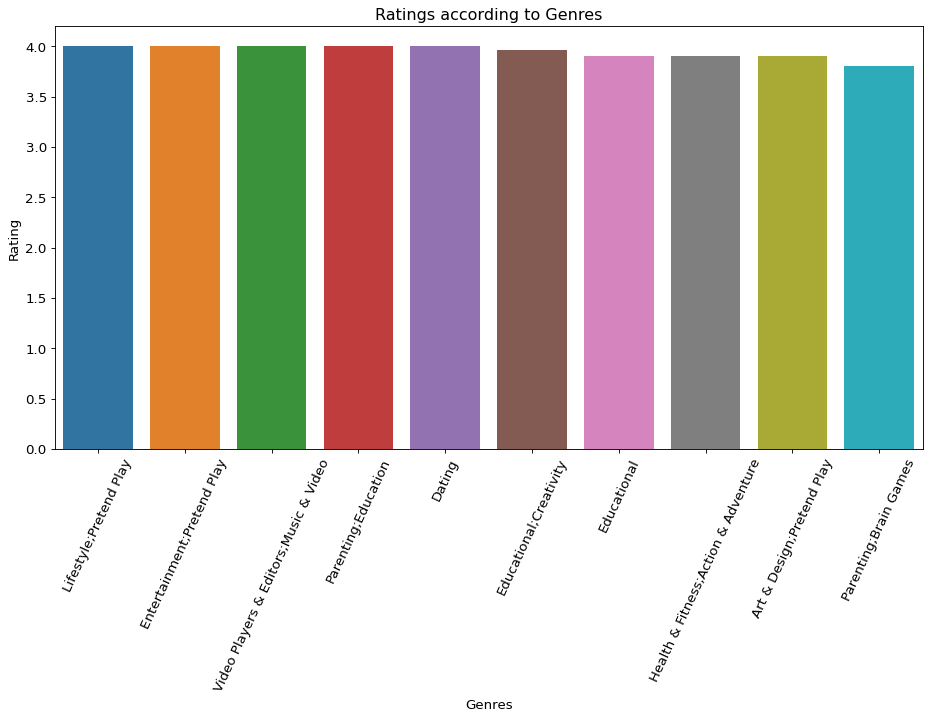

In [429]:
# Bar plot for lowest rated genres
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)

## **From the above plot we can see top 10 lowest rated genres is having Average Rating of 4 or Less than 4**

## **What are top 3 category having highest number of installs  and highest number Application?**

In [430]:
top_category = play_s_d.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = play_s_d.groupby(['Category'])[['Installs']].sum()

In [431]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_3_category_installs = top_category_installs.sort_values('Count',ascending=False)[0:3]

In [432]:
category_app = play_s_d.groupby(['Category'])[['App']].count()
top_category_app=pd.merge(top_category,category_app,on='Category')
top_3_category_app = top_category_app.sort_values('Count',ascending=False)[0:3]

#**I am using 2 plots**:
# Pie plot for representing Precentage of Category based on number of count of application
# bar plot for displaying count of Installs for category

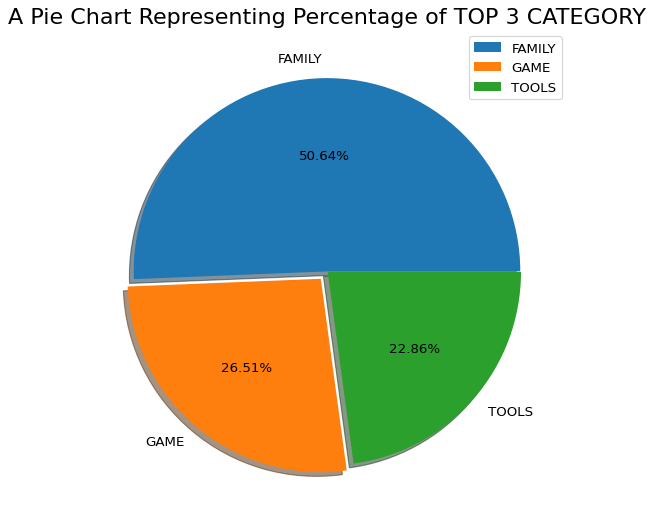

In [433]:

counts = list(top_3_category_app['App'])
labels = top_3_category_app['Category']
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05,0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of TOP 3 CATEGORY', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

## **As we can see from above Graph top 3 Category are Family , Game and Tools**
## Family category is having highest number Application

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



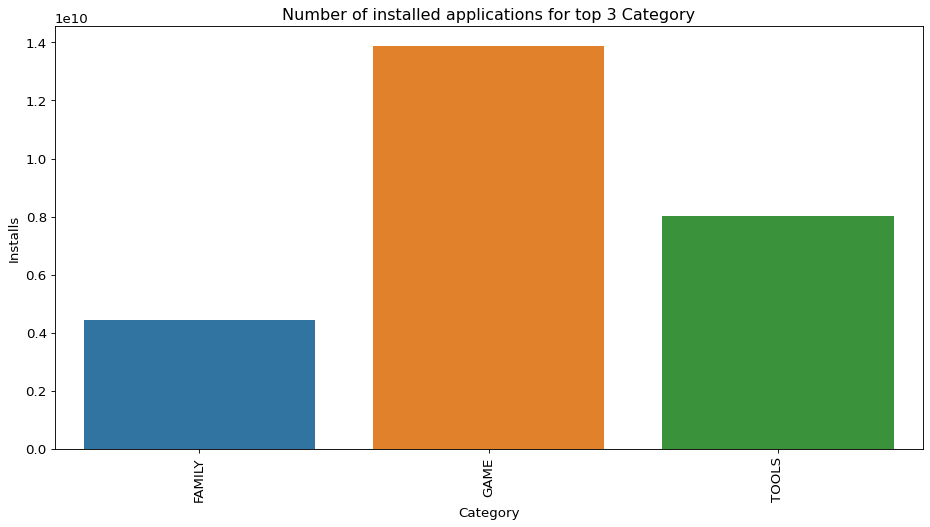

In [434]:
# Bar plot for top 3 category
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for top 3 Category")
sns.barplot(top_3_category_installs.Category, top_3_category_installs.Installs)
plt.show()

## **we can see the diffrence between above two graph Family category is having highest number of Application but the Game category is having highest number of installs**

## **which content rating highest number of installed Application?**

In [435]:
top_Content_Rating = play_s_d.Content_Rating.value_counts().reset_index().rename(columns={'Content_Rating':'Count','index':'Content_Rating'})
Content_Rating_installs = play_s_d.groupby(['Content_Rating'])[['Installs']].sum()
top_Content_Rating_installs = pd.merge(top_Content_Rating, Content_Rating_installs, on='Content_Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



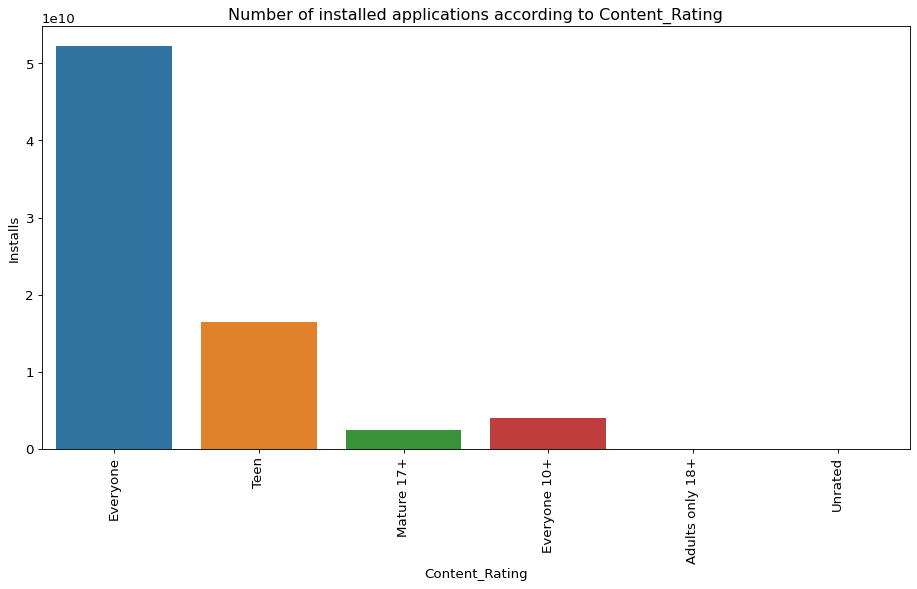

In [436]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Content_Rating")
plt.ylabel("Installs")
plt.title("Number of installed applications according to Content_Rating")
sns.barplot(top_Content_Rating_installs.Content_Rating, top_Content_Rating_installs.Installs)
plt.show()

## **It can be seen from above plot Content Rating "Everyone" is having highest number of installed Application**

## **Apps which are added or updated based on year**

In [437]:
## Exctracting year from Last_Updated column
play_s_d['year'] = pd.DatetimeIndex(play_s_d['Last_Updated']).year

In [438]:
update_date=play_s_d.year.value_counts().reset_index().rename(columns={'year':'Count','index':'year'})

In [439]:
update_installs=play_s_d.groupby(['year'])[['App']].count()

In [440]:
update_type=play_s_d.groupby(['year'])[['Type']].sum()

In [441]:
update_instasll_date = pd.merge(update_date, update_installs, on='year')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



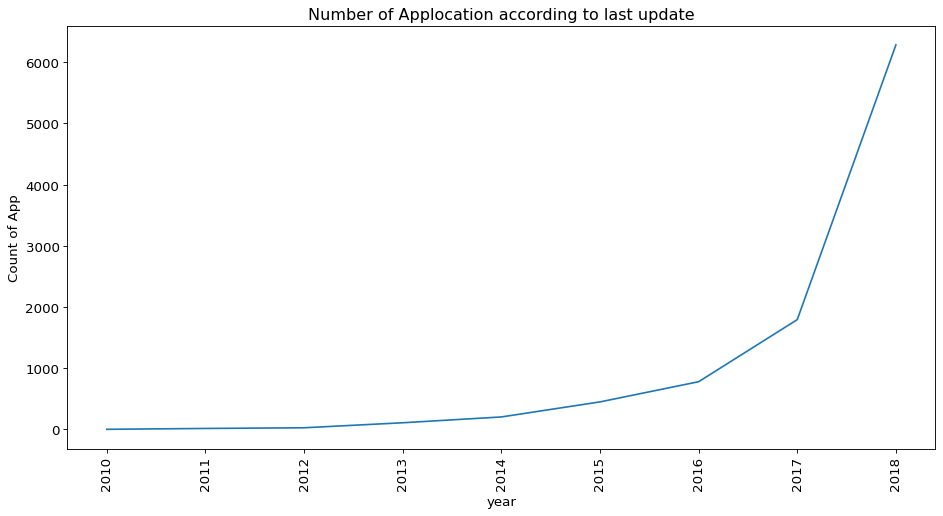

In [442]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("Count of App")
plt.title("Number of Applocation according to last update")
sns.lineplot(update_instasll_date.year, update_instasll_date.App)
plt.show()

## **As we can see from Above Graph that  comparing the apps updated or added in the year 2011 and 2018  apps are increases from 80% to 90%**

##**Applications are added or updated based on month**

In [443]:
# Taking Month from last_Updated column
play_s_d['month'] = pd.DatetimeIndex(play_s_d['Last_Updated']).month

In [444]:
play_s_d['month_']=pd.DatetimeIndex(play_s_d['Last_Updated']).month_name()

In [445]:
installapp_month=play_s_d[['month','App']].groupby(['month']).count().reset_index()

In [446]:
fig = go.Figure(data=[go.Line(
            x=installapp_month.month, y=installapp_month.App,
            text=installapp_month.month,
            
        )])

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



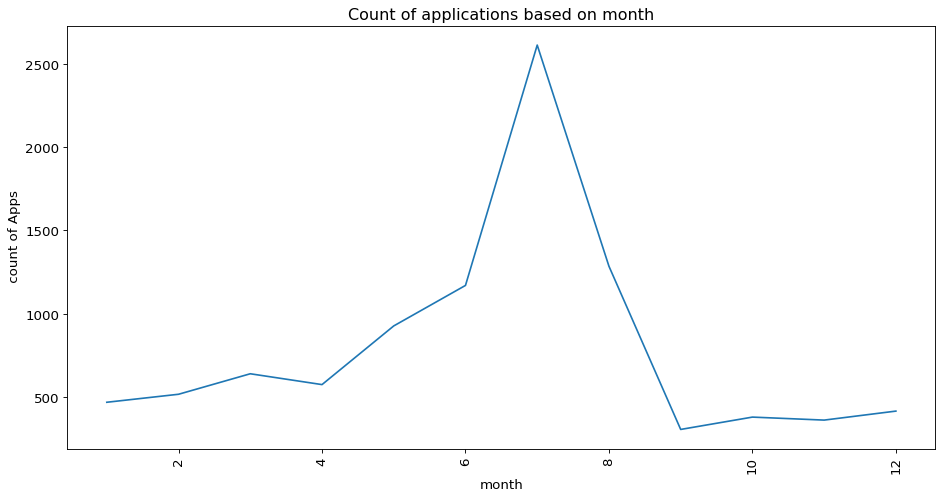

In [447]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel(" count of Apps")
plt.title("Count of applications based on month")
sns.lineplot(installapp_month.month, installapp_month.App)


##**In this data almost 50% apps are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaining months.**

##**Paid apps vs Free apps**

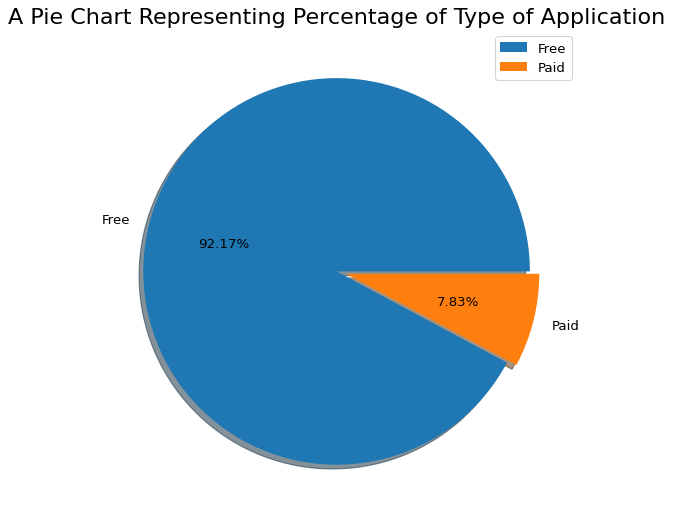

In [448]:
counts = list(play_s_d['Type'].value_counts())
labels = 'Free', 'Paid'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Type of Application', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

##**Here we can see that 92.17% apps are free and 7.83% apps are paid on Google Play Store, so we can say that Most of the apps are free on Google Play Store.**


##**which paid app is having hightest number of user and its gener and category?**


In [449]:
paid_App=pd.DataFrame(play_s_d.loc[play_s_d['Type']=='Paid']).reset_index()

In [450]:
install_paid_app=pd.DataFrame(paid_App.loc[paid_App['Installs']==paid_App.Installs.max()])

In [451]:
install_paid_app[['App','Installs','Category','Genres','Price']]

,App,Installs,Category,Genres,Price
52,Minecraft,10000000.0,FAMILY,Arcade;Action & Adventure,6.99
141,Hitman Sniper,10000000.0,GAME,Action,0.99


##**as we can see from above output :TWO paid apps having highest number of installs  Mincraft and Hitman Sniper**

##**which paid app is having lowest number of user and its gener and category?**


In [452]:
install_paid_app2=pd.DataFrame(paid_App.loc[paid_App['Installs']==paid_App.Installs.min()])

In [453]:
install_paid_app2[['App','Installs','Category','Genres','Price','year']].reset_index()

,index,App,Installs,Category,Genres,Price,year
0,210,Popsicle Launcher for Android P 9.0 launcher,0.0,PERSONALIZATION,Personalization,1.49,2018
1,303,Ak Parti Yardım Toplama,0.0,SOCIAL,Social,13.99,2017
2,331,AP Series Solution Pro,0.0,FAMILY,Education,1.99,2017
3,366,Ain Arabic Kids Alif Ba ta,0.0,FAMILY,Education,2.99,2016
4,430,cronometra-br,0.0,PRODUCTIVITY,Productivity,154.99,2017
5,659,EG | Explore Folegandros,0.0,TRAVEL_AND_LOCAL,Travel & Local,3.99,2017
6,687,EP Cook Book,0.0,MEDICAL,Medical,200.00,2015
7,695,Eu sou Rico,0.0,FINANCE,Finance,30.99,2018
8,697,Eu Sou Rico,0.0,FINANCE,Finance,394.99,2018
9,700,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.0,LIFESTYLE,Lifestyle,399.99,2017


##**We can see from above output there are 10 apps which is does not have any user**

In [454]:
update_installs=play_s_d.groupby(['year','Type']).size().reset_index(name='yearCount')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



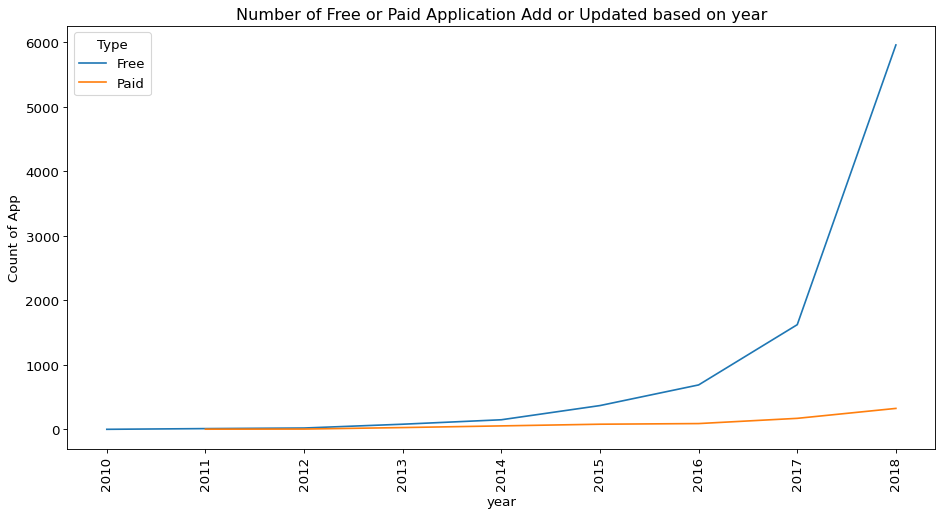

In [455]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("Count of App")
plt.title("Number of Free or Paid Application Add or Updated based on year")
sns.lineplot('year','yearCount',hue='Type',data=update_installs)
plt.show()

##**By observing above plot we can conclude that before 2011 there were no paid apps, but with the years passing free apps has been added more in comparison to paid apps.**

In [456]:
installapp_month=play_s_d.groupby(['month','Type']).size().reset_index(name='monthCount')

In [457]:
# installapp_month=play_s_d.groupby(['month']).size().reset_index(name='monthCount')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



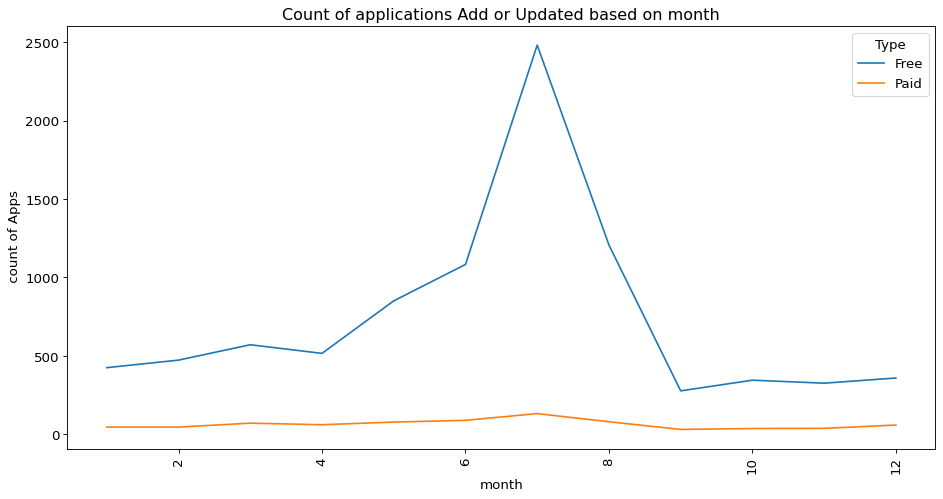

In [458]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel(" count of Apps")
plt.title("Count of applications Add or Updated based on month")
sns.lineplot('month', 'monthCount', hue='Type',data=installapp_month)

## **From above plot we can see that Free apps are more frequently added or updated as compare to Paid apps**

In [459]:
update_date=play_s_d[['month','Type']].value_counts().reset_index().sort_values(by='month').rename(columns={'month':'month','index':'month'})

In [460]:
# Changing column name
update_date.rename(columns={0:'count_ofApp'},inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



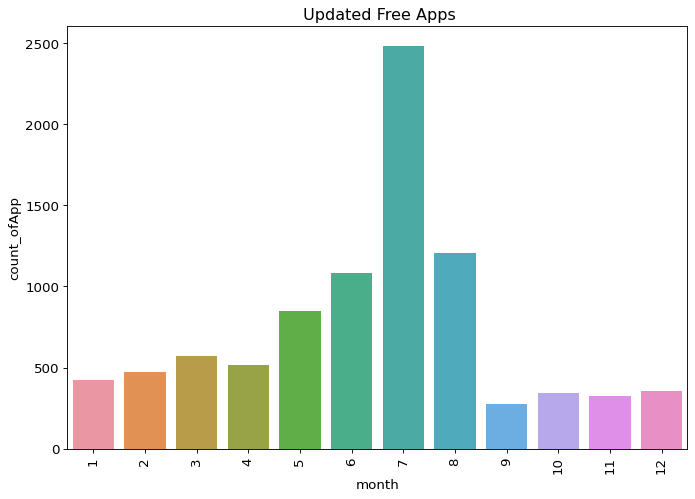

In [461]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel("month")
plt.title(' Updated Free Apps')
free_update=update_date.loc[update_date['Type']=='Free'].sort_values(by='month')
sns.barplot(free_update.month, free_update.count_ofApp)

##**In this  almost 50% free apps are added or updated on the month of July**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



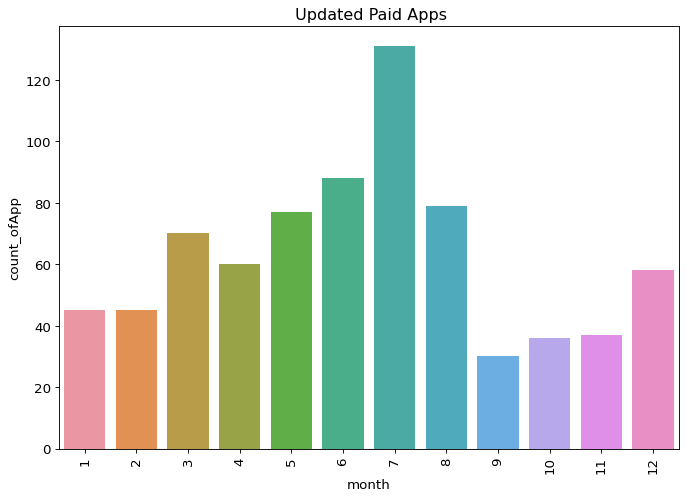

In [462]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.xlabel("month")
plt.title(' Updated Paid Apps')
paid_update=update_date.loc[update_date['Type']=='Paid'].sort_values(by='month')
sns.barplot(paid_update.month, paid_update.count_ofApp)

##**Same as free apps most of the paid apps too updates in the month of July**

## **Current Version of Application**

In [463]:
version_type=play_s_d.Current_Ver.value_counts().reset_index().rename(columns={'Current_Ver':'Count','index':'Current_Ver'})
version_installed=play_s_d.groupby(['Current_Ver'])[['App']].count()
current_versions = pd.merge(version_type, version_installed, on='Current_Ver').sort_values('Count',ascending=False)[:20]

In [464]:
import plotly.graph_objects as go


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



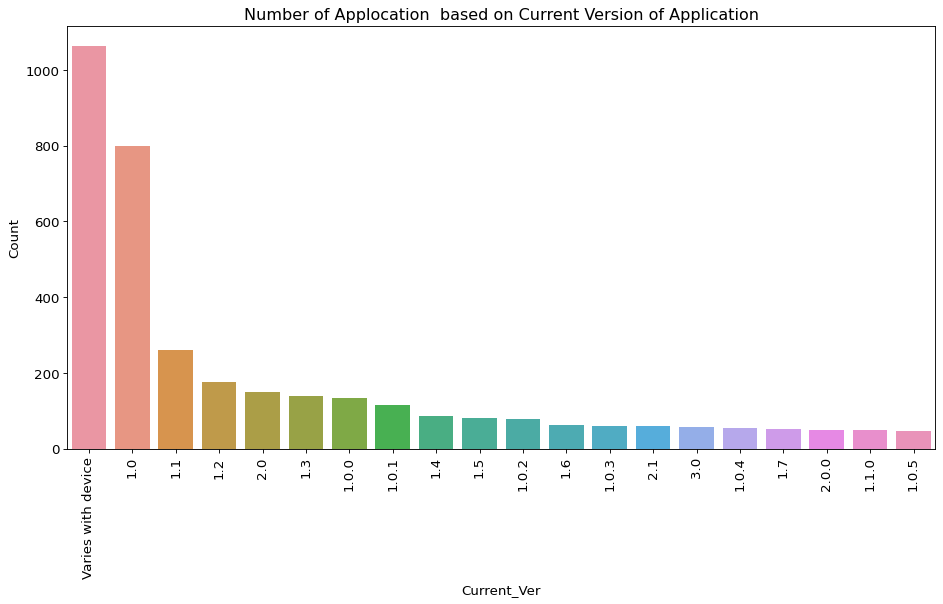

In [465]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Version")
plt.ylabel("")
plt.title("Number of Applocation  based on Current Version of Application")
sns.barplot(current_versions.Current_Ver,'Count',data=current_versions)
plt.show()


## **we can see from above plot most of the Applications are having Current version "Varies with device" and version "1.0"**

## **Andriod Version requirement of Apps**

In [466]:
version_type=play_s_d.Android_Ver.value_counts().reset_index().rename(columns={'Android_Ver':'Count','index':'Android_Ver'})
version_installed=play_s_d.groupby(['Android_Ver'])[['App']].count()
versions_ = pd.merge(version_type, version_installed, on='Android_Ver')[:20]

In [467]:

fig = go.Figure(data=[go.Bar(
            x=versions_.Android_Ver, y=versions_.Count,
            text=versions_.Android_Ver,
            
        )])

fig.show()

##**By observing above plot we can conclude that most of the Applications requirement of Android version is 4.1 and up**

In [475]:
size_app=play_s_d.groupby(['Size'])['App'].count().reset_index().sort_values('App',ascending=False)[0:20]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



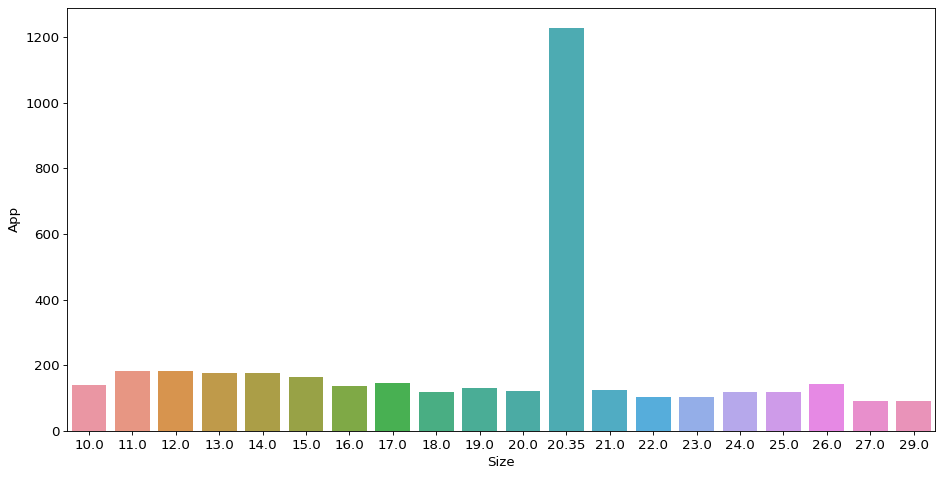

In [476]:
plt.figure(figsize=(14,7))
sns.barplot(size_app.Size,size_app.App)

In [482]:
size_installs=play_s_d.groupby(['Size'])['Installs'].sum().reset_index().sort_values('Installs',ascending=False)[0:20]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



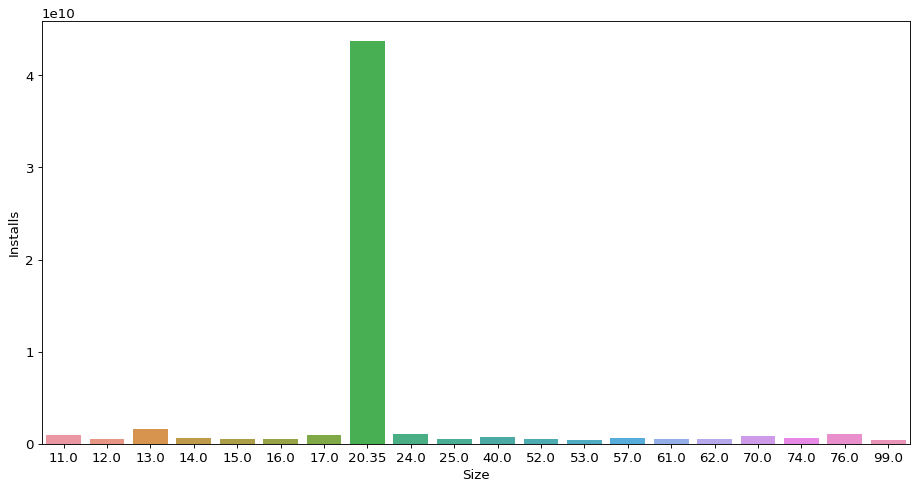

In [485]:
plt.figure(figsize=(14,7))
sns.barplot(size_installs.Size,size_installs.Installs)